In [21]:
## import packages
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import json
import pandas as pd
import spacy
import itertools as it
from collections import defaultdict
from textblob import TextBlob

In [22]:
## load all speeches
with open('speeches.json') as json_data:
    speeches = json.load(json_data)
    json_data.close()

In [23]:
## divide the data by year
df = defaultdict(list)
for speech in speeches:
    year = int(speech['title'].split(':')[0].split(',')[1])
    df[year].append(speech['transcript'])

In [24]:
# hasNumbers removes all strings that include a number
def hasNumbers(inputString):
    return bool(re.search(r'\d', inputString))

## define the data cleaning function for nlp
def nlp_cleaning(trans):
    tokens = word_tokenize(trans)
    # convert to lower case
    tokens = [w.lower() for w in tokens]    
    
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    return words
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    words = [word for word in words if not hasNumbers(word)]
    
    # stemming of words
    porter = PorterStemmer()
    return [porter.stem(word) for word in words]

In [25]:
## store the cleaned speeches into the following dictionary
sentiment = defaultdict(list)
for key, values in df.items():
    transcript = u' '.join([" ".join([v for v in value]) for value in values])
    # clean the transcript
    transcript_cleaned = " ".join(nlp_cleaning(transcript))
    sentiment[key].append(list(TextBlob(transcript_cleaned).sentiment))

**sentiment analysis**

In [26]:
## extract sentiment (first element of the sentiment analysis in TextBlob)
sent_by_year = dict()
for key, value in sentiment.items():
    sent_by_year[key] = value[0][0]


In [27]:
## convert the dictionary to pandas frame 
sentiment = pd.Series(sent_by_year)
sentiment = pd.DataFrame(sentiment).reset_index()
sentiment.columns = ['year', 'sentiment']

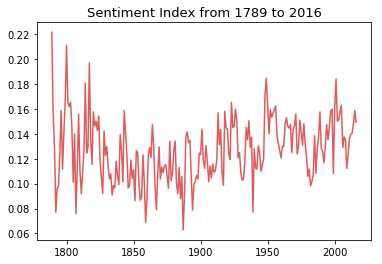

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(sentiment['year'], sentiment['sentiment'], color='#e05c5c');
plt.title('Sentiment Index from 1789 to 2016', fontsize=13);
plt.rcParams["figure.figsize"] = [20,12];

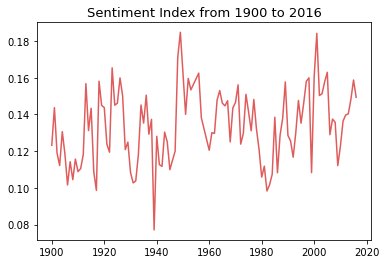

In [29]:
%matplotlib inline
plt.plot(sentiment['year'][111:], sentiment['sentiment'][111:], color='#e05c5c');
plt.title('Sentiment Index from 1900 to 2016', fontsize=13);

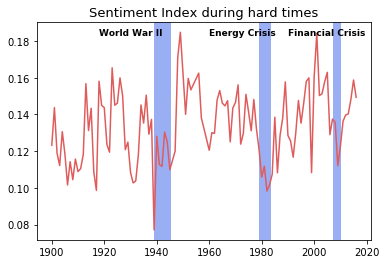

In [30]:
## visualize sentiment
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(sentiment['year'][111:], sentiment['sentiment'][111:], color='#e05c5c');
plt.title('Sentiment Index during hard times', fontsize=13);
plt.axvspan(1939, 1945, color='#9aaef4');
plt.axvspan(1979, 1983, color='#9aaef4');
plt.axvspan(2007, 2010, color='#9aaef4');
font = {'family': 'sans-serif',
       'color': 'black',
       'weight': 'semibold',
       'size': 9}

plt.text(1918, 0.183, 'World War II', fontdict=font);
plt.text(1960, 0.183, 'Energy Crisis', fontdict=font);
plt.text(1990, 0.183, 'Financial Crisis', fontdict=font);

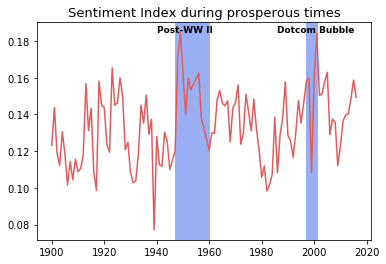

In [31]:
## visualize sentiment
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(sentiment['year'][111:], sentiment['sentiment'][111:], color='#e05c5c');
plt.title('Sentiment Index during prosperous times', fontsize=13);
plt.axvspan(1947, 1960, color='#9aaef4');
plt.axvspan(1997, 2001, color='#9aaef4');
font = {'family': 'sans-serif',
       'color': 'black',
       'weight': 'semibold',
       'size': 9}
#plt.text(s='World War II', x=10, y=10);
plt.text(1940, 0.185, 'Post-WW II', fontdict=font);
plt.text(1986, 0.185, 'Dotcom Bubble', fontdict=font);